# Importing all libraries..

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_train=pd.read_csv("train.csv")
print(data_train)

FileNotFoundError: [Errno 2] File b'train.csv' does not exist: b'train.csv'

In [ ]:
data_test=pd.read_csv("test.csv")
print(data_test)

In [ ]:
train=data_train.shape[0]
test=data_test.shape[0]
ratio=round(train/(train+test),1)
print("Number of observation in the training set:%d (%d%%)" %(train,ratio*100))
print("Number of observation in the test set:%d (%d%%)" %(test,(1-ratio)*100))


In [ ]:
data_train.info()

In [ ]:
data_train.sample(10)

In [ ]:
data_titanic=data_train.drop(["Ticket","Cabin","Name"],axis=1)

In [ ]:
data_titanic_na=data_titanic.dropna()

In [ ]:
data_titanic_na.Sex=data_titanic.Sex.map({"female": 0, "Male":1})
data_titanic_na.Embarked=data_titanic.Embarked.map({"C": 0, "Q": 1,"S" :2})

In [21]:
data_titanic_na.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,NaN,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,NaN,35.0,0,0,8.0500,2.0


[Text(0, 0, 'Dead'), Text(0, 0, 'Survived')]

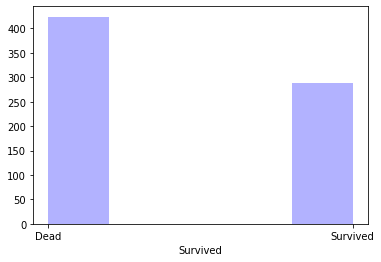

In [22]:
d=sns.distplot(data_titanic_na.Survived,color="Blue", hist_kws={"alpha":0.3},kde=None)
d.set_xticks([0,1])
d.autoscale()
d.set_xticklabels(["Dead","Survived"])

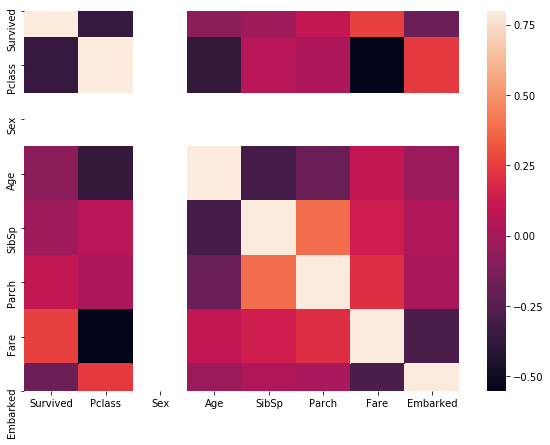

In [23]:
corrmat=data_titanic_na[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].corr()
f,ax=plt.subplots(figsize=(10,7))
sns.heatmap(corrmat,vmax=.8,square=True)

In [25]:
survived = data_titanic_na.Survived == 1
died = data_titanic_na.Survived == 0

[Text(0, 0, 'Cherbourg'),
 Text(0, 0, ''),
 Text(0, 0, 'Queenstown'),
 Text(0, 0, ''),
 Text(0, 0, 'Southampton')]

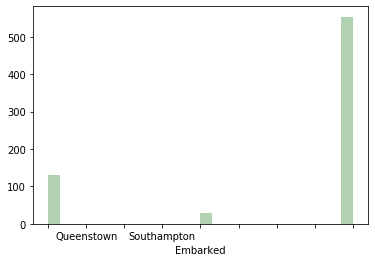

In [26]:
g = sns.distplot(data_titanic_na.Embarked, color="darkgreen", hist_kws={"alpha": 0.3}, kde=None)
g.set_xticklabels(["Cherbourg", "", "Queenstown", "", "Southampton"])

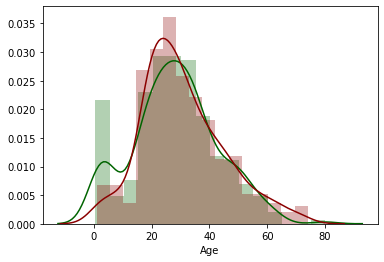

In [27]:

sns.distplot(data_titanic_na[survived].Age, color="darkgreen", hist_kws={"alpha": 0.3})
sns.distplot(data_titanic_na[died].Age, color="darkred", hist_kws={"alpha": 0.3})

In [30]:
data_titanic_ml = data_titanic.copy()

In [31]:
data_titanic_ml.Embarked = data_titanic_ml.Embarked.fillna("Southampton") 

In [32]:
data_titanic_ml[data_titanic_ml.Embarked.isnull()].shape

(0, 9)

In [33]:
null_age = data_titanic_ml.Age.isnull()
data_titanic_ml[null_age].shape

(177, 9)

In [34]:
data_titanic_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [35]:
data_titanic_ml.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
